In [43]:
from speedml import Speedml

%matplotlib inline

In [45]:
ml = Speedml('E:/titanic/train.csv', 
              'E:/titanic/test.csv', 
              target = 'Survived',
              uid = 'PassengerId')

In [47]:
sml.train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


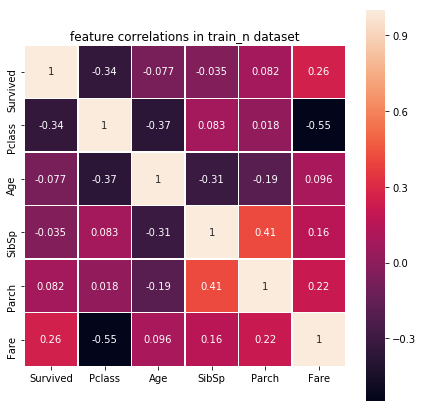

In [48]:
sml.plot.correlate()

<Figure size 432x288 with 0 Axes>

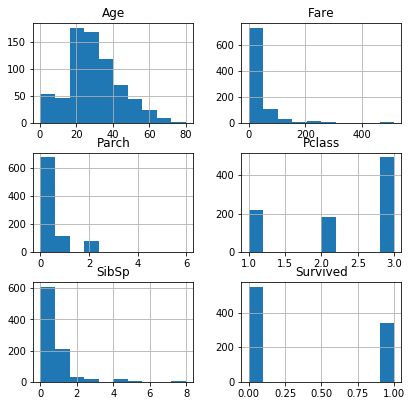

In [49]:
sml.plot.distribute()

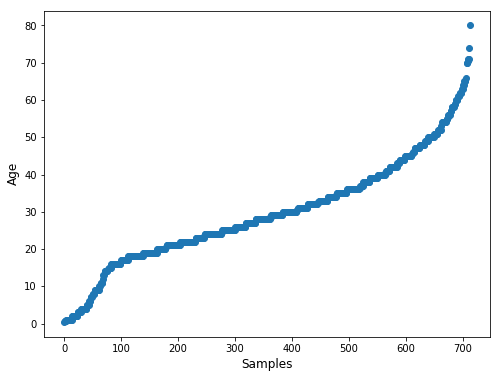

In [50]:
sml.plot.continuous('Age')

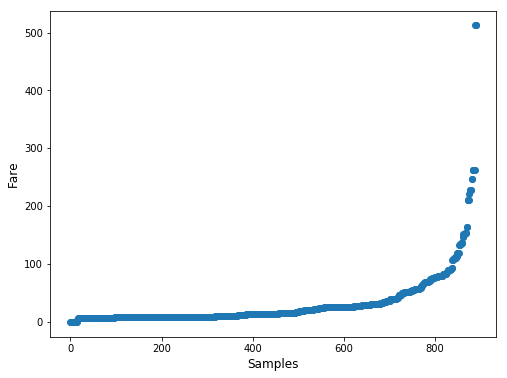

In [51]:
sml.plot.continuous('Fare')

In [52]:
sml.feature.outliers('Fare', upper=99)

'Fixed 9 or 1.01% upper outliers. '

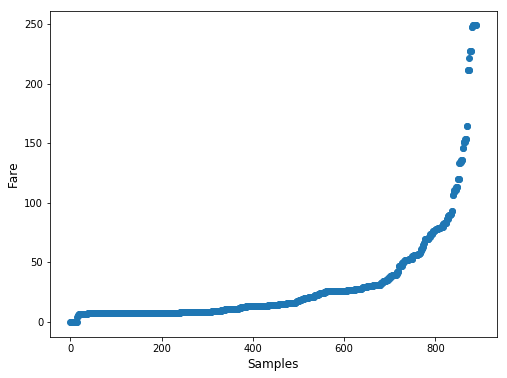

In [53]:
sml.plot.continuous('Fare')

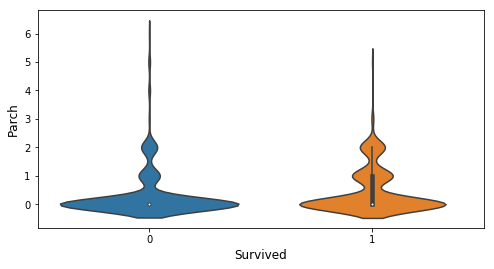

Fixed 6 or 0.67% upper outliers. 


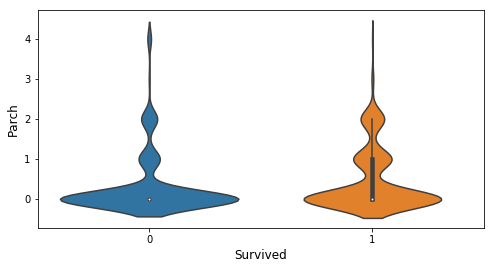

In [54]:
sml.plot.ordinal('Parch')
print(sml.feature.outliers('Parch', upper=99))
sml.plot.ordinal('Parch')

In [55]:
sml.feature.density('Age')
sml.train[['Age', 'Age_density']].head()

,Age,Age_density
0,22.0,27
1,38.0,11
2,26.0,18
3,35.0,18
4,35.0,18


In [56]:
sml.feature.density('Ticket')
sml.train[['Ticket', 'Ticket_density']].head()

,Ticket,Ticket_density
0,A/5 21171,1
1,PC 17599,1
2,STON/O2. 3101282,1
3,113803,2
4,373450,1


In [57]:
sml.feature.drop(['Ticket'])

'Dropped 1 features with 12 features available.'

In [58]:
sml.plot.crosstab('Survived', 'SibSp')

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


In [59]:
sml.plot.crosstab('Survived', 'Parch')

Parch,0.0,1.0,2.0,3.0,4.0
Survived,,,,,
0,445,53,40,2,9
1,233,65,40,3,1


In [60]:
sml.feature.fillna(a='Cabin', new='Z')
sml.feature.extract(new='Deck', a='Cabin', regex='([A-Z]){1}')
sml.feature.drop(['Cabin'])
sml.feature.mapping('Sex', {'male': 0, 'female': 1})
sml.feature.sum(new='FamilySize', a='Parch', b='SibSp')
sml.feature.add('FamilySize', 1)

'Filled 1014 null values across test and train datasets.'

'Dropped 1 features with 12 features available.'

In [61]:
sml.plot.crosstab('Survived', 'Deck')

Deck,A,B,C,D,E,F,G,T,Z
Survived,,,,,,,,,
0,8,12,24,8,8,5,2,1,481
1,7,35,35,25,24,8,2,0,206


In [62]:
sml.plot.crosstab('Survived', 'FamilySize')

FamilySize,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,11.0
Survived,,,,,,,,,
0,374,72,43,8,14,20,6,5,7
1,163,89,59,21,3,4,3,0,0


In [63]:
sml.feature.drop(['Parch', 'SibSp'])

'Dropped 2 features with 11 features available.'

In [64]:
sml.feature.impute()

C:\py\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


'Imputed 179 empty values to 0.'

In [65]:
sml.train.info()
print('-'*50)
sml.test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
Age               891 non-null float64
Age_density       891 non-null int64
Deck              891 non-null object
Embarked          891 non-null object
FamilySize        891 non-null float64
Fare              891 non-null float64
Name              891 non-null object
Pclass            891 non-null int64
Sex               891 non-null int64
Survived          891 non-null int64
Ticket_density    891 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 83.5+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 10 columns):
Age               418 non-null float64
Age_density       418 non-null int64
Deck              418 non-null object
Embarked          418 non-null object
FamilySize        418 non-null float64
Fare              418 non-null float64
Name              418 non-null

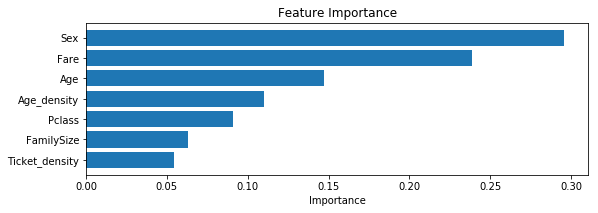

In [66]:
sml.plot.importance()

In [67]:
sml.feature.extract(new='Title', a='Name', regex=' ([A-Za-z]+)\.')
sml.plot.crosstab('Title', 'Sex')

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [68]:
sml.feature.replace(a='Title', match=['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], new='Rare')

'Replaced matching list of strings across train and test datasets.'

In [69]:
sml.feature.replace('Title', 'Mlle', 'Miss')

'Replaced 2 matching values across train and test datasets.'

In [70]:
sml.feature.replace('Title', 'Ms', 'Miss')
sml.feature.replace('Title', 'Mme', 'Mrs')
sml.train[['Name', 'Title']].head()

'Replaced 2 matching values across train and test datasets.'

'Replaced 1 matching values across train and test datasets.'

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [72]:
sml.feature.drop(['Name'])
sml.feature.labels(['Title', 'Embarked', 'Deck'])
sml.train.head()



'Dropped 1 features with 11 features available.'

C:\py\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


,Age,Age_density,Deck,Embarked,FamilySize,Fare,Pclass,Sex,Survived,Ticket_density,Title
0,22.0,27,8,2,2.0,7.2500,3,0,0,1,2
1,38.0,11,2,0,2.0,71.2833,1,1,1,1,3
2,26.0,18,8,2,1.0,7.9250,3,1,1,1,1
3,35.0,18,2,2,2.0,53.1000,1,1,1,2,3
4,35.0,18,8,2,1.0,8.0500,3,0,0,1,2


<Figure size 432x288 with 0 Axes>

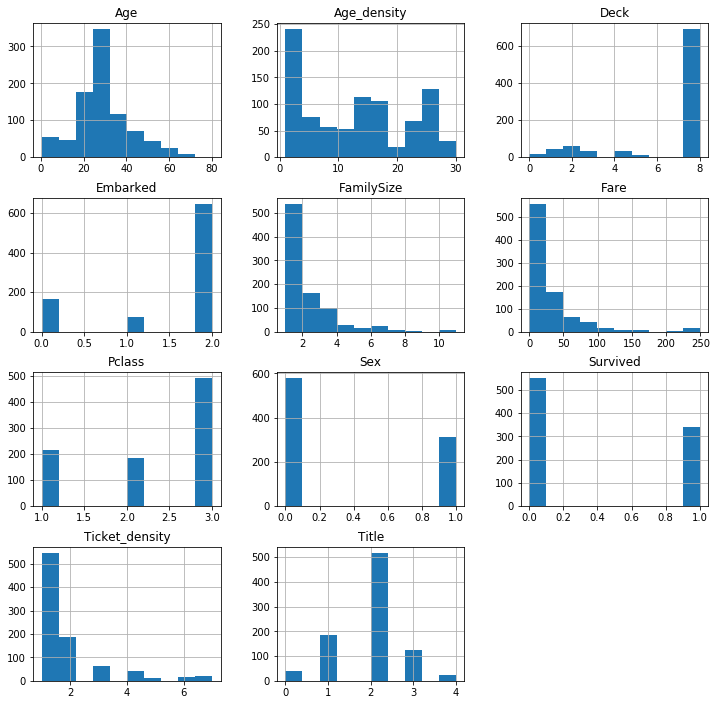

In [73]:
sml.plot.distribute()

In [74]:
sml.configure('overfit_threshold', 
              sml.np.sqrt(sml.train.shape[0]) / sml.train.shape[0])

{'outpath': 'output/',
 'outlier_threshold': 3,
 'overfit_threshold': 0.033501260508640406,
 'high_cardinality': 10,
 'unique_ratio': 80}

In [75]:
sml.eda()

,Results,Observations
Speedml Release,v0.9.3,Visit https://speedml.com for release notes.
Outliers Upper,[Fare],Positive skew (> 3). Use feature.outliers(upper).
Shape,"train (891, 11) | test (418, 10)",
Numerical High-cardinality,"[Age, Age_density, Fare]",(>10) categories. Use feature.density
Numerical Categorical,"[Deck, Embarked, FamilySize, Pclass, Sex, Surv...",Use plot.ordinal.
Target Analysis (Survived),Model ready.,Use classification models.


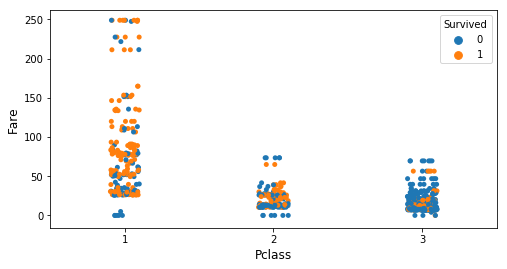

In [76]:
sml.plot.strip('Pclass', 'Fare')

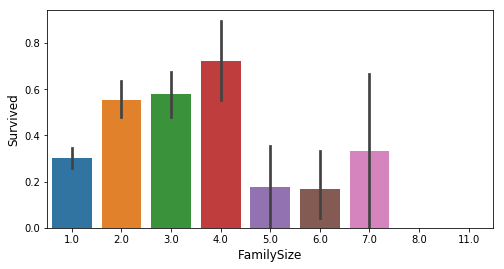

In [81]:
sml.plot.bar('FamilySize', 'Survived')

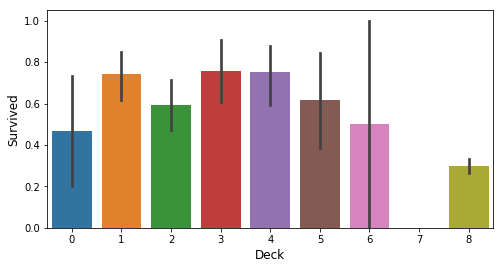

In [82]:
sml.plot.bar('Deck', 'Survived')

In [83]:

sml.model.data()

C:\py\lib\site-packages\speedml\model.py:32: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  Base.train_X = Base.train.drop([Base.target], axis=1).as_matrix()
C:\py\lib\site-packages\speedml\model.py:33: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  Base.test_X = Base.test.as_matrix()


'train_X: (891, 10) train_y: (891,) test_X: (418, 10)'

In [85]:

select_params = {'max_depth': [3,5,7], 'min_child_weight': [1,3,5]}
fixed_params = {'learning_rate': 0.1, 'subsample': 0.8, 
                'colsample_bytree': 0.8, 'seed':0, 
                'objective': 'binary:logistic'}

sml.xgb.hyper(select_params, fixed_params)

C:\py\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\py\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\py\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\py\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('sp

,rank,params
7,1,"{'max_depth': 7, 'min_child_weight': 3}"
3,2,"{'max_depth': 5, 'min_child_weight': 1}"
5,2,"{'max_depth': 5, 'min_child_weight': 5}"
8,2,"{'max_depth': 7, 'min_child_weight': 5}"
0,5,"{'max_depth': 3, 'min_child_weight': 1}"
1,6,"{'max_depth': 3, 'min_child_weight': 3}"
4,6,"{'max_depth': 5, 'min_child_weight': 3}"
2,8,"{'max_depth': 3, 'min_child_weight': 5}"
6,9,"{'max_depth': 7, 'min_child_weight': 1}"


In [86]:
select_params = {'learning_rate': [0.3, 0.1, 0.01], 'subsample': [0.7,0.8,0.9]}
fixed_params = {'max_depth': 3, 'min_child_weight': 1, 
                'colsample_bytree': 0.8, 'seed':0, 
                'objective': 'binary:logistic'}

sml.xgb.hyper(select_params, fixed_params)

C:\py\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\py\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\py\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\py\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('sp

,rank,params
3,1,"{'learning_rate': 0.1, 'subsample': 0.7}"
1,2,"{'learning_rate': 0.3, 'subsample': 0.8}"
0,3,"{'learning_rate': 0.3, 'subsample': 0.7}"
5,3,"{'learning_rate': 0.1, 'subsample': 0.9}"
4,5,"{'learning_rate': 0.1, 'subsample': 0.8}"
2,6,"{'learning_rate': 0.3, 'subsample': 0.9}"
6,7,"{'learning_rate': 0.01, 'subsample': 0.7}"
7,8,"{'learning_rate': 0.01, 'subsample': 0.8}"
8,9,"{'learning_rate': 0.01, 'subsample': 0.9}"


In [88]:
tuned_params = {'learning_rate': 0.1, 'subsample': 0.8, 
                'max_depth': 3, 'min_child_weight': 1,
                'seed':0, 'colsample_bytree': 0.8, 
                'objective': 'binary:logistic'}
sml.xgb.cv(tuned_params)

[17:27:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:27:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:27:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:27:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:27:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 14 extra nodes, 0 pruned nodes, max_depth=3
[17:27:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 12 extra nodes, 0 pruned nodes, max_depth=3
[17:27:07] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

C:\py\lib\site-packages\speedml\xgb.py:54: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  self.error = self.cv_results.get_value(len(self.cv_results) - 1, 'test-error-mean')


In [89]:
sml.xgb.cv_results.tail(5)


,train-error-mean,train-error-std,test-error-mean,test-error-std
11,0.156568,0.005057,0.178463,0.017663
12,0.155725,0.005928,0.175092,0.012108
13,0.154603,0.005458,0.176210,0.011612
14,0.154323,0.006497,0.172845,0.013077
15,0.152920,0.006004,0.170592,0.013059


In [90]:

tuned_params['n_estimators'] = sml.xgb.cv_results.shape[0] - 1
sml.xgb.params(tuned_params)

In [91]:
sml.xgb.classifier()

C:\py\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\py\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\py\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\py\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an

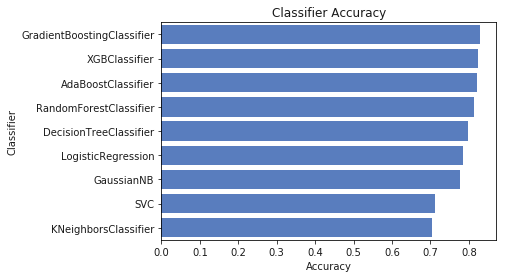

In [92]:

sml.model.evaluate()
sml.plot.model_ranks()

In [94]:
sml.model.ranks()

,Classifier,Accuracy
0,GradientBoostingClassifier,0.830000
0,XGBClassifier,0.824444
0,AdaBoostClassifier,0.822222
0,RandomForestClassifier,0.814444
0,DecisionTreeClassifier,0.797778
0,LogisticRegression,0.785556
0,GaussianNB,0.776667
0,SVC,0.712222
0,KNeighborsClassifier,0.704444


In [97]:

sml.xgb.fit()
sml.xgb.predict()

C:\py\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [99]:
sml.xgb.feature_selection()

C:\py\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\py\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\py\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\py\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an

Accuracy: 78.730000%
Thresh=0.038, n=10, Accuracy: 78.73%
Thresh=0.042, n=9, Accuracy: 78.36%
Thresh=0.058, n=8, Accuracy: 77.24%


C:\py\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\py\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\py\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\py\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an

Thresh=0.066, n=7, Accuracy: 76.87%
Thresh=0.068, n=6, Accuracy: 76.12%
Thresh=0.073, n=5, Accuracy: 76.12%
Thresh=0.086, n=4, Accuracy: 68.28%
Thresh=0.097, n=3, Accuracy: 69.03%
Thresh=0.186, n=2, Accuracy: 69.40%
Thresh=0.286, n=1, Accuracy: 69.40%


C:\py\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\py\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [100]:
sml.xgb.sample_accuracy()

C:\py\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


'Accuracy = 84.51%. Found 753 correct of 891 total labels'

In [102]:
sml.save_results(
    columns={ 'PassengerId': sml.uid,
             'Survived': sml.xgb.predictions }, 
    file_path='E:/titanic/titanic-speedml-{}.csv'.format(sml.slug()))
sml.slug()

'Results saved.'

'e17.06-m82.44-s84.51-f78.73'